# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import plot_model


from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import h5py
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=3a57e4ed81bf8ab0fde77df9ece94287aac0c9d6b69718bfbf41c0506c264f31
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import arff  # from liac-arff
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler
import scipy.signal as signal
from scipy.interpolate import interp1d
import json
from sklearn.preprocessing import LabelEncoder
import random
from PIL import Image
import io
import base64
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dropout, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical  # If using one-hot encoding


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt


In [ ]:
!pip install skrebate


  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=b2117e03aafbab2fe76b933000adcb4c821550e17803ff8449b95dab3a77bcf7
  Stored in directory: /root/.cache/pip/wheels/03/4c/36/bc6b70d88998635e0ec0e617d15cd97483f5008d6bb77c1c7a
Successfully built skrebate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [ ]:
import pandas as pd
import numpy as np
import h5py
from sklearn.preprocessing import StandardScaler

# New dictionary for final activities
activityIDdict = {
    0: 'standing',
    1: 'sitting',
    2: 'walking',
    3: 'running',
    4: 'stairs'
}

def read_files():
    list_of_files = [f'Protocol/subject10{i}.dat' for i in range(1, 10)]
    base_path = '/content/drive/MyDrive/PAMAP2_Dataset/'

    colNames = ["timestamp", "activityID", "heartrate"]

    IMUhand = ['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
               'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
               'handGyro1', 'handGyro2', 'handGyro3',
               'handMagne1', 'handMagne2', 'handMagne3',
               'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']
    IMUchest = ['chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
                'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
                'chestGyro1', 'chestGyro2', 'chestGyro3',
                'chestMagne1', 'chestMagne2', 'chestMagne3',
                'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']
    IMUankle = ['ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
                'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
                'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
                'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
                'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

    columns = colNames + IMUhand + IMUchest + IMUankle

    data_frames = []
    for file in list_of_files:
        full_file_path = base_path + file
        print(f"Reading {full_file_path}...")
        procData = pd.read_table(full_file_path, header=None, sep='\s+')
        procData.columns = columns
        procData['subject_id'] = int(file.split('subject')[-1][0:3])
        data_frames.append(procData)

    dataCollection = pd.concat(data_frames, ignore_index=True)
    return dataCollection

def scale(df):
    scaler = StandardScaler()
    feature_cols = df.columns.difference(['activityID', 'subject_id'])
    df[feature_cols] = scaler.fit_transform(df[feature_cols])
    return df

def dataCleaning(dataCollection):
    # Keep only activityID, subject_id and selected hand sensors (acc + gyro)
    keep_cols = [
        'activityID', 'subject_id',
        'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
        'handGyro1', 'handGyro2', 'handGyro3'
    ]
    dataCollection = dataCollection[keep_cols]

    # Remove transient activity
    dataCollection = dataCollection[dataCollection.activityID != 0]

    # Ensure numeric + drop missing
    dataCollection = dataCollection.apply(pd.to_numeric, errors='coerce')
    dataCollection = dataCollection.dropna()

    # Scale features
    dataCollection = scale(dataCollection)

    print("Data cleaned! (Only Hand Accelerometer + Gyroscope kept)")
    return dataCollection

def reset_label(dataCollection):
    mapping = {
        3: 0,   # standing
        2: 1,   # sitting
        4: 2,   # walking
        5: 3,   # running
        12: 4,  # ascending_stairs
        13: 4   # descending_stairs -> merged
    }
    dataCollection = dataCollection[dataCollection.activityID.isin(mapping.keys())]
    dataCollection['activityID'] = dataCollection['activityID'].map(mapping)
    return dataCollection

def downsize(data):
    downsample_size = 3
    return data[::downsample_size, :]

def segment(data, window_size):
    X, y, subjects = [], [], []
    n = len(data)
    start = 0

    activity_idx = 0   # activityID
    subject_idx = 1    # subject_id

    while start + window_size - 1 < n:
        end = start + window_size - 1
        if data[start][activity_idx] == data[end][activity_idx] and data[start][subject_idx] == data[end][subject_idx]:
            # Exclude activityID (0) and subject_id (1), keep only features
            X.append(data[start:end+1, 2:])
            y.append(data[start][activity_idx])
            subjects.append(data[start][subject_idx])
            start += window_size // 2
        else:
            while start + window_size - 1 < n:
                if data[start][activity_idx] != data[start + 1][activity_idx]:
                    break
                start += 1
            start += 1

    print("Segmented shape:", np.asarray(X).shape, np.asarray(y).shape)
    return {'inputs': np.asarray(X), 'labels': np.asarray(y, dtype=int), 'subjects': np.asarray(subjects, dtype=int)}

def save_data(data, file_name):
    with h5py.File(file_name, 'w') as f:
        for key in data:
            print(f"Saving: {key}")
            f.create_dataset(key, data=data[key])
    print('Saved to', file_name)

# === Main Pipeline ===
window_size = 60
data = read_files()
data = dataCleaning(data)
data = reset_label(data)
numpy_data = data.to_numpy()
segment_data = segment(numpy_data, window_size)

# Optionally save
# save_data(segment_data, 'pamap_hand_acc_gyro.h5')


<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1214113857.py:43: SyntaxWarning: invalid escape sequence '\s'
  procData = pd.read_table(full_file_path, header=None, sep='\s+')


Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject101.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject102.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject103.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject104.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject105.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject106.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject107.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject108.dat...
Reading /content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject109.dat...
Data cleaned! (Only Hand Accelerometer + Gyroscope kept)
Segmented shape: (30810, 60, 6) (30810,)


/tmp/ipython-input-1214113857.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCollection['activityID'] = dataCollection['activityID'].map(mapping)


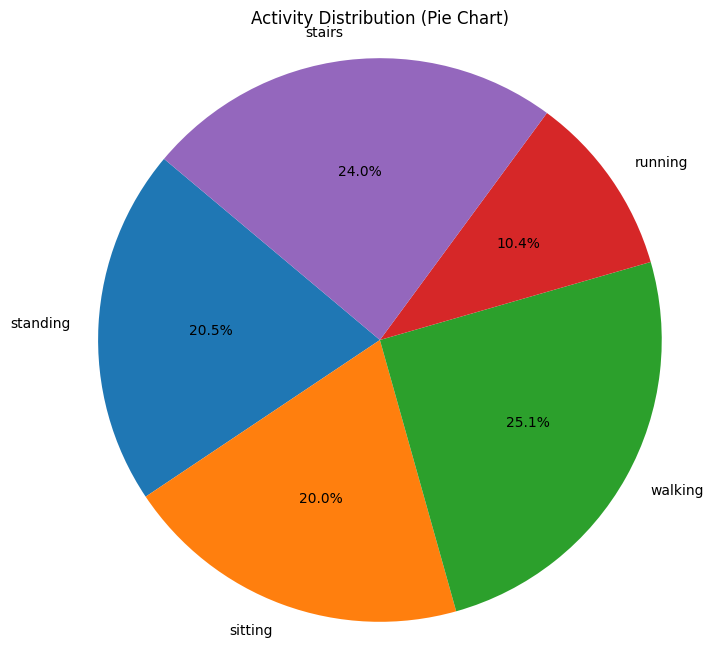

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each activity ID
activity_counts = data['activityID'].value_counts().sort_index()

# Get the activity labels using the dictionary
activity_labels = [activityIDdict.get(act_id, f"Unknown {act_id}") for act_id in activity_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_labels, autopct='%1.1f%%', startangle=140)
plt.title("Activity Distribution (Pie Chart)")
plt.axis('equal')
plt.show()

/tmp/ipython-input-255633120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='activityID', palette='tab20')


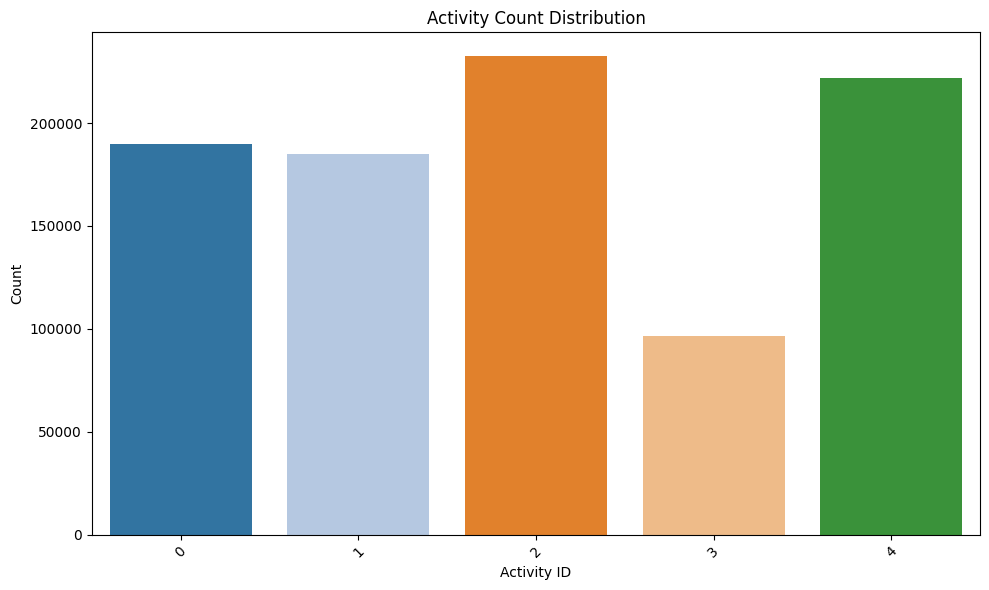

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='activityID', palette='tab20')
plt.title('Activity Count Distribution')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

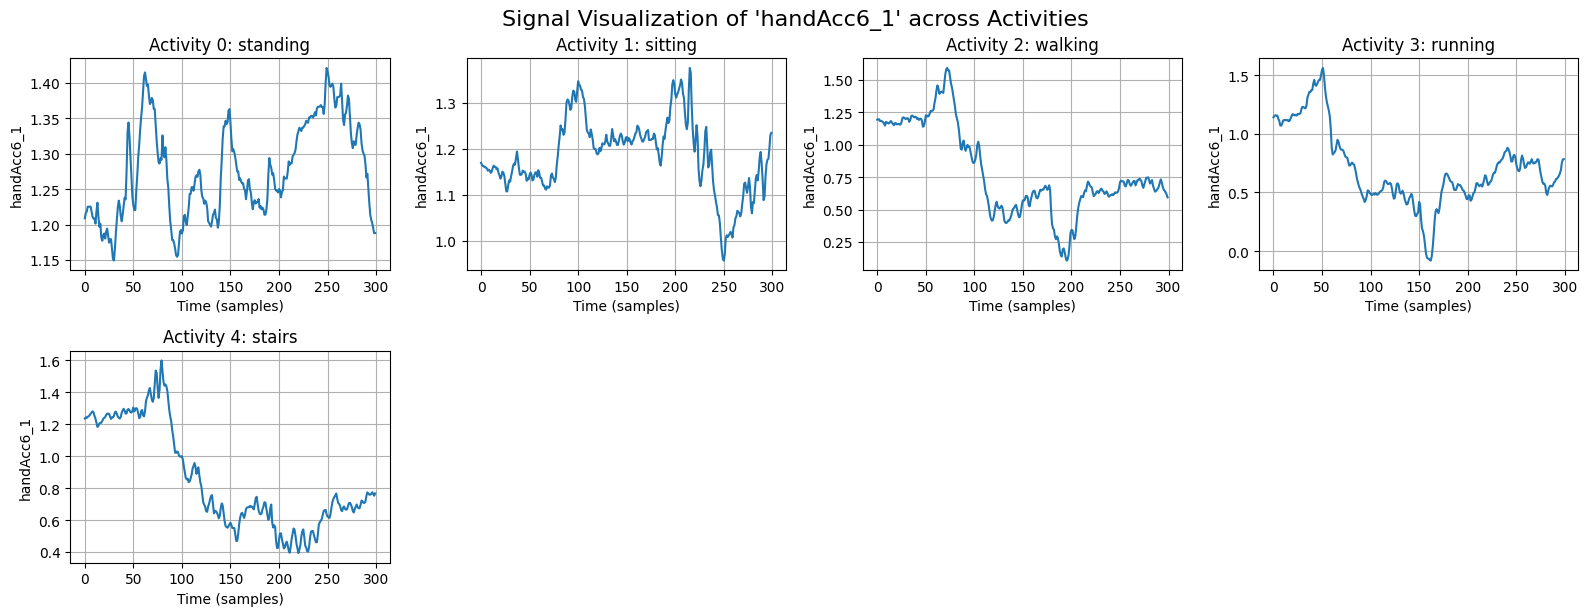

In [ ]:
import matplotlib.pyplot as plt

# Choose a sensor column to visualize (you can change this)
sensor_column = 'handAcc6_1'

# Unique activities present in your cleaned dataset
unique_activities = sorted(data['activityID'].unique())

# Set up plot
n_activities = len(unique_activities)
n_cols = 4
n_rows = (n_activities + n_cols - 1) // n_cols

plt.figure(figsize=(4 * n_cols, 3 * n_rows))

for i, act in enumerate(unique_activities, 1):
    ax = plt.subplot(n_rows, n_cols, i)

    # Filter for this activity
    df_act = data[data['activityID'] == act]

    # Just get the first 300 points from the activity
    signal = df_act[sensor_column].values[:300]

    ax.plot(signal)
    ax.set_title(f"Activity {act}: {activityIDdict.get(act, 'Unknown')}")
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel(sensor_column)
    ax.grid(True)

plt.tight_layout()
plt.suptitle(f"Signal Visualization of '{sensor_column}' across Activities", fontsize=16, y=1.02)
plt.show()

#DATA PROCESSING

In [ ]:
X = segment_data['inputs']
y = segment_data['labels']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (24648, 60, 6) (24648,)
Testing shape: (6162, 60, 6) (6162,)


In [ ]:
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4]
5


In [ ]:
# One-hot encode labels
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

def display_results(y_true, y_pred, classNames):
    # Convert one-hot encoded labels to class indices if needed
    if y_true.ndim > 1:
        y_true = np.argmax(y_true, axis=1)
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # Classification Report
    print("\n**** Classification Report ****")
    print(classification_report(y_true, y_pred, target_names=classNames))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classNames, yticklabels=classNames)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

#1D CNN Model

In [ ]:
# === Build CNN Model ===
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', padding='same', input_shape=(60, 6)),  # 64 filters
    MaxPooling1D(pool_size=2),

    Conv1D(192, kernel_size=3, activation='relu', padding='same'),  # 192 filters
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    verbose=1
)
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")

Epoch 1/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.7144 - loss: 0.7942 - val_accuracy: 0.8609 - val_loss: 0.4276
Epoch 2/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8506 - loss: 0.4537 - val_accuracy: 0.8799 - val_loss: 0.3620
Epoch 3/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8713 - loss: 0.3926 - val_accuracy: 0.8890 - val_loss: 0.3466
Epoch 4/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8798 - loss: 0.3656 - val_accuracy: 0.8903 - val_loss: 0.3354
Epoch 5/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8864 - loss: 0.3402 - val_accuracy: 0.8955 - val_loss: 0.3170
Epoch 6/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8979 - loss: 0.3113 - val_accuracy: 0.9008 - val_loss: 0.3059
Epoch 7/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9039 - loss: 0.2898 - val_accuracy: 0.9043 - val_loss: 0.2993
Epoch 8/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9066 - loss: 0.2833 - 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, F1 (macro for multi-class)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy : 0.9120
Precision: 0.9182
Recall   : 0.9153
F1 Score : 0.9166


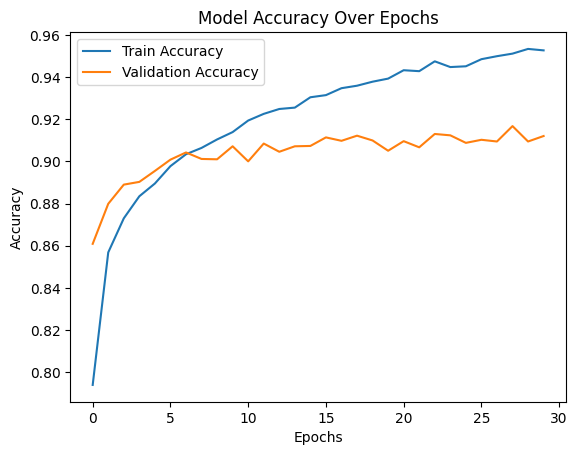

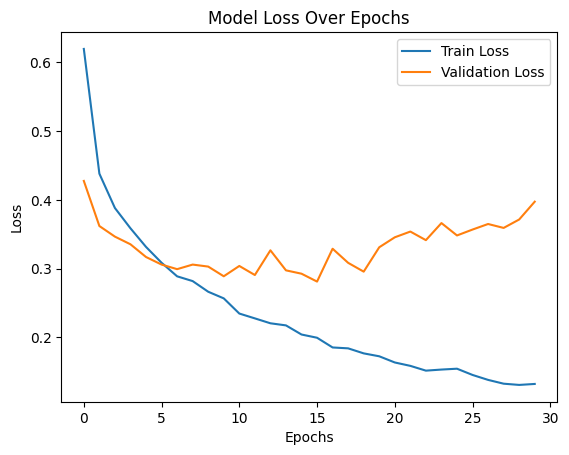

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 60, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 30, 192)        │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 15, 192)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       368,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,225,361 (4.67 MB)

 Trainable params: 408,453 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 816,908 (3.12 MB)

In [ ]:
batch_size = 64
# evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model.predict(X_test)

Accuracy of the CNN model 0.9120415449142456
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step



**** Classification Report ****
              precision    recall  f1-score   support

     Walking       0.86      0.89      0.87      1247
     Jogging       0.94      0.92      0.93      1221
      Stairs       0.95      0.93      0.94      1567
     Sitting       0.97      0.95      0.96       654
    Standing       0.87      0.89      0.88      1473

    accuracy                           0.91      6162
   macro avg       0.92      0.92      0.92      6162
weighted avg       0.91      0.91      0.91      6162



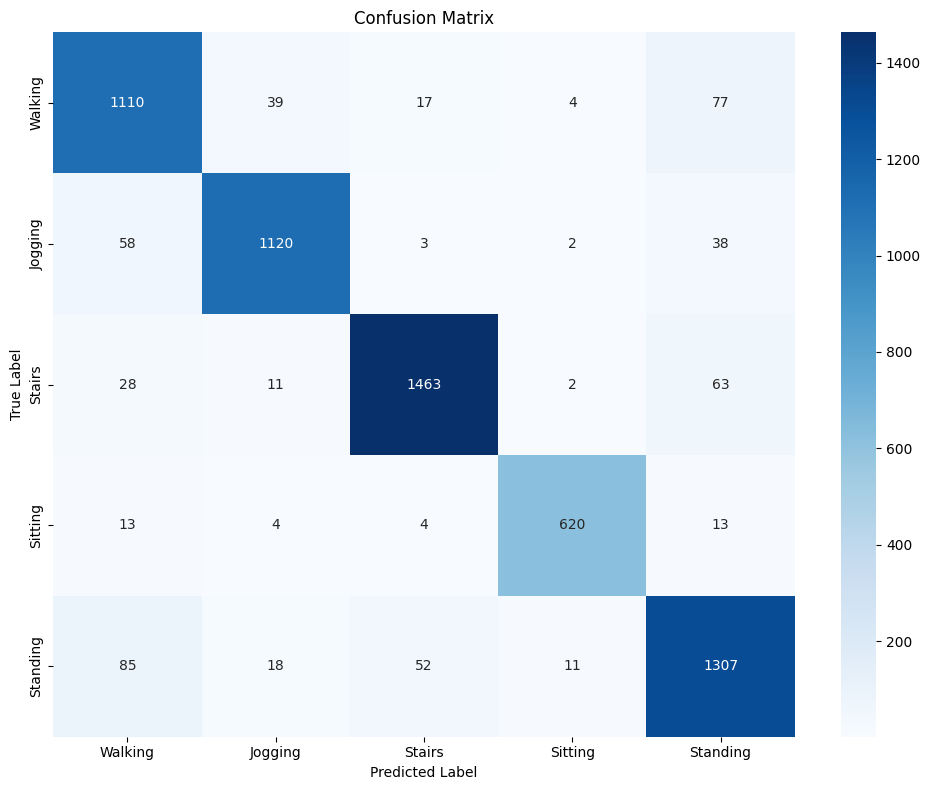

In [ ]:
classNames=['Walking','Jogging','Stairs','Sitting',
    'Standing',
    # 'Writing',
    # 'Eating',
    # 'Playing sports'
]
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions from probabilities to class labels (integer class labels)
predictions_labels = np.argmax(predictions, axis=1)
display_results(y_test_labels, predictions_labels, classNames)

#2D - CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape input for 2D CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], 60, 6, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 60, 6, 1)

input_shape = (60, 6, 1)
num_classes = y_train.shape[1]   # assuming y is one-hot encoded

# Build 2D CNN model
model_2d_cnn = Sequential([
    Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile with best learning rate
model_2d_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (optional but recommended)
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     tf.keras.callbacks.ModelCheckpoint(
#         '/content/drive/MyDrive/HAR Data & Models/pamap2_best_2dcnn_model.h5',
#         save_best_only=True,
#         monitor='val_loss'
#     )
# ]

# Train
history = model_2d_cnn.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=30,
    batch_size=64,
    #callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc = model_2d_cnn.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"✅ 2D CNN Test Accuracy: {test_acc:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.5275 - loss: 1.1943 - val_accuracy: 0.8105 - val_loss: 0.6277
Epoch 2/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 53s 137ms/step - accuracy: 0.7739 - loss: 0.7168 - val_accuracy: 0.8187 - val_loss: 0.5499
Epoch 3/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 82s 136ms/step - accuracy: 0.8069 - loss: 0.6282 - val_accuracy: 0.8392 - val_loss: 0.4989
Epoch 4/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 81s 135ms/step - accuracy: 0.8227 - loss: 0.5674 - val_accuracy: 0.8492 - val_loss: 0.4691
Epoch 5/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.8330 - loss: 0.5393 - val_accuracy: 0.8559 - val_loss: 0.4410
Epoch 6/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 54s 140ms/step - accuracy: 0.8422 - loss: 0.5044 - val_accuracy: 0.8593 - val_loss: 0.4246
Epoch 7/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.8449 - loss: 0.4870 - val_accuracy: 0.8577 - val_loss: 0.4251
Epoch 8/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8513 - loss: 0.4649 - val

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict class probabilities
y_pred_probs = model_2d_cnn.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, F1 (macro for multi-class)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
Accuracy : 0.8948
Precision: 0.9062
Recall   : 0.8991
F1 Score : 0.9017


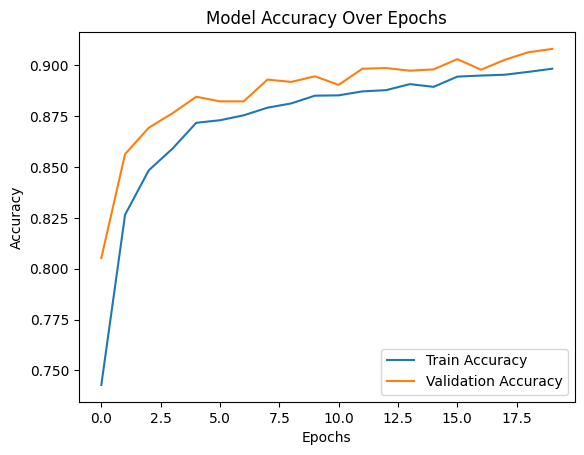

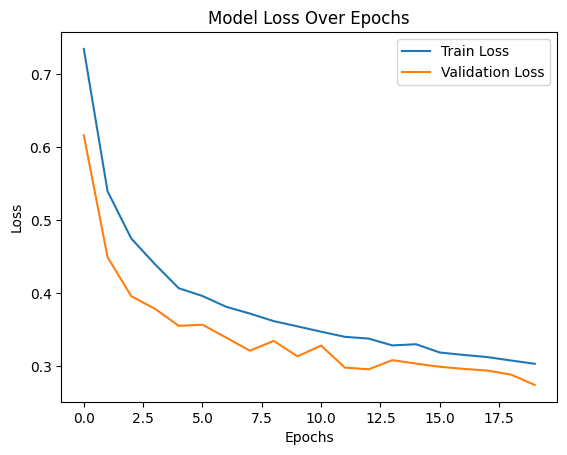

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

In [ ]:
model_2d_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 6, 96)      │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 3, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 3, 128)     │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       122,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 704,849 (2.69 MB)

 Trainable params: 234,949 (917.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 469,900 (1.79 MB)

In [ ]:
batch_size = 64
# evaluate model
test_loss, test_accuracy = model_2d_cnn .evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model_2d_cnn.predict(X_test)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>


**** Classification Report ****
              precision    recall  f1-score   support

     Walking       0.83      0.91      0.87      1247
     Jogging       0.93      0.91      0.92      1221
      Stairs       0.95      0.93      0.94      1567
     Sitting       0.99      0.93      0.96       654
    Standing       0.88      0.88      0.88      1473

    accuracy                           0.91      6162
   macro avg       0.92      0.91      0.91      6162
weighted avg       0.91      0.91      0.91      6162



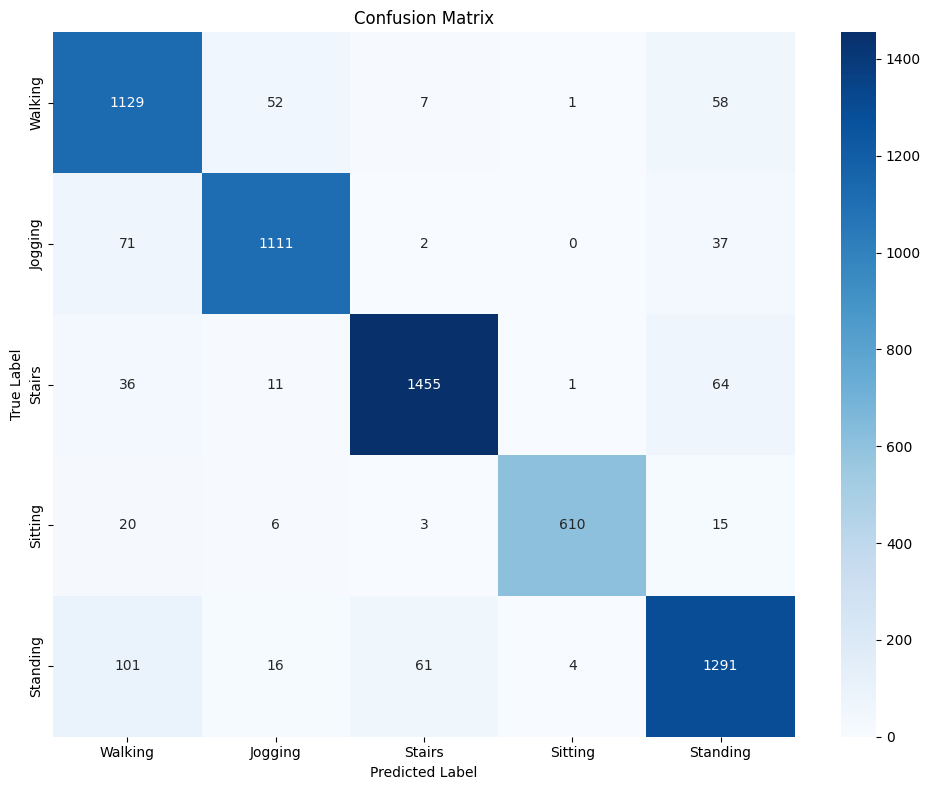

In [ ]:
classNames=['Walking','Jogging','Stairs','Sitting',
    'Standing',
    # 'Writing',
    # 'Eating',
    # 'Playing sports'
]
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions from probabilities to class labels (integer class labels)
predictions_labels = np.argmax(predictions, axis=1)
display_results(y_test_labels, predictions_labels, classNames)

#LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Dataset info
input_shape = (60, 6)  # timesteps=60, features=6
num_classes = y_train.shape[1]

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 60, 6))
X_test_lstm = X_test.reshape((X_test.shape[0], 60, 6))

# Build final LSTM model with best params
model_lstm = Sequential([
    LSTM(96, return_sequences=True, input_shape=input_shape),
    Dropout(0.3),

    LSTM(128),
    Dropout(0.3),

    Dense(192, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compile with best learning rate
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (recommended)
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     tf.keras.callbacks.ModelCheckpoint(
#         '/content/drive/MyDrive/HAR Data & Models/pamap2_best_lstm_model.h5',
#         save_best_only=True,
#         monitor='val_loss'
#     )
# ]

# Train
history = model_lstm.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=25,
    batch_size=64,
    #callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc = model_lstm.evaluate(X_test_lstm, y_test, verbose=0)
print(f" LSTM Test Accuracy: {test_acc:.4f}")

# # Save final trained model
# model_lstm.save("final_lstm_model.h5")
# print("Final model saved as final_lstm_model.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 95s 234ms/step - accuracy: 0.4483 - loss: 1.3306 - val_accuracy: 0.7736 - val_loss: 0.6800
Epoch 2/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 138s 223ms/step - accuracy: 0.7755 - loss: 0.6942 - val_accuracy: 0.8312 - val_loss: 0.5319
Epoch 3/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 90s 234ms/step - accuracy: 0.8256 - loss: 0.5770 - val_accuracy: 0.8484 - val_loss: 0.4846
Epoch 4/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 87s 225ms/step - accuracy: 0.8331 - loss: 0.5327 - val_accuracy: 0.8548 - val_loss: 0.4519
Epoch 5/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 86s 223ms/step - accuracy: 0.8494 - loss: 0.4883 - val_accuracy: 0.8656 - val_loss: 0.4324
Epoch 6/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 91s 235ms/step - accuracy: 0.8517 - loss: 0.4798 - val_accuracy: 0.8707 - val_loss: 0.4161
Epoch 7/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 149s 254ms/step - accuracy: 0.8622 - loss: 0.4565 - val_accuracy: 0.8690 - val_loss: 0.4136
Epoch 8/25
386/386 ━━━━━━━━━━━━━━━━━━━━ 92s 239ms/step - accuracy: 0.8699 - loss:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict class probabilities
y_pred_probs = model_lstm.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, F1 (macro for multi-class)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step
Accuracy : 0.8932
Precision: 0.9010
Recall   : 0.8974
F1 Score : 0.8987


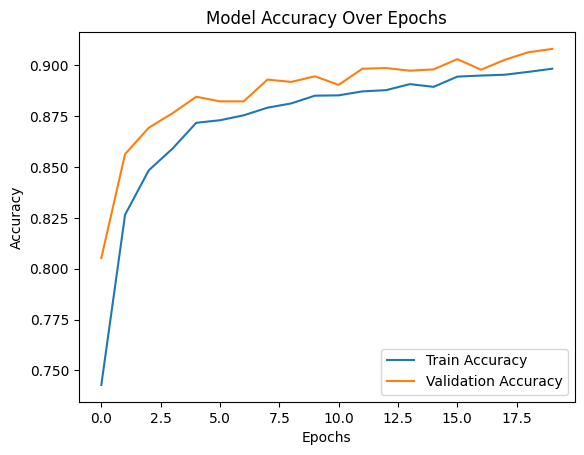

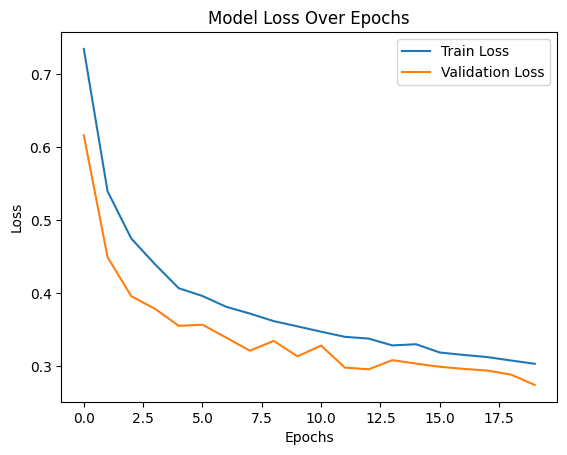

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

In [ ]:
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 96)         │        39,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       115,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 192)            │        24,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,457 (2.07 MB)

 Trainable params: 180,485 (705.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 360,972 (1.38 MB)

In [ ]:
batch_size = 64
# evaluate model
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model_lstm.predict(X_test)

Accuracy of the CNN model 0.8932164907455444
193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step



**** Classification Report ****
              precision    recall  f1-score   support

     Walking       0.81      0.88      0.84      1247
     Jogging       0.89      0.90      0.89      1221
      Stairs       0.94      0.92      0.93      1567
     Sitting       0.98      0.94      0.96       654
    Standing       0.89      0.85      0.87      1473

    accuracy                           0.89      6162
   macro avg       0.90      0.90      0.90      6162
weighted avg       0.90      0.89      0.89      6162



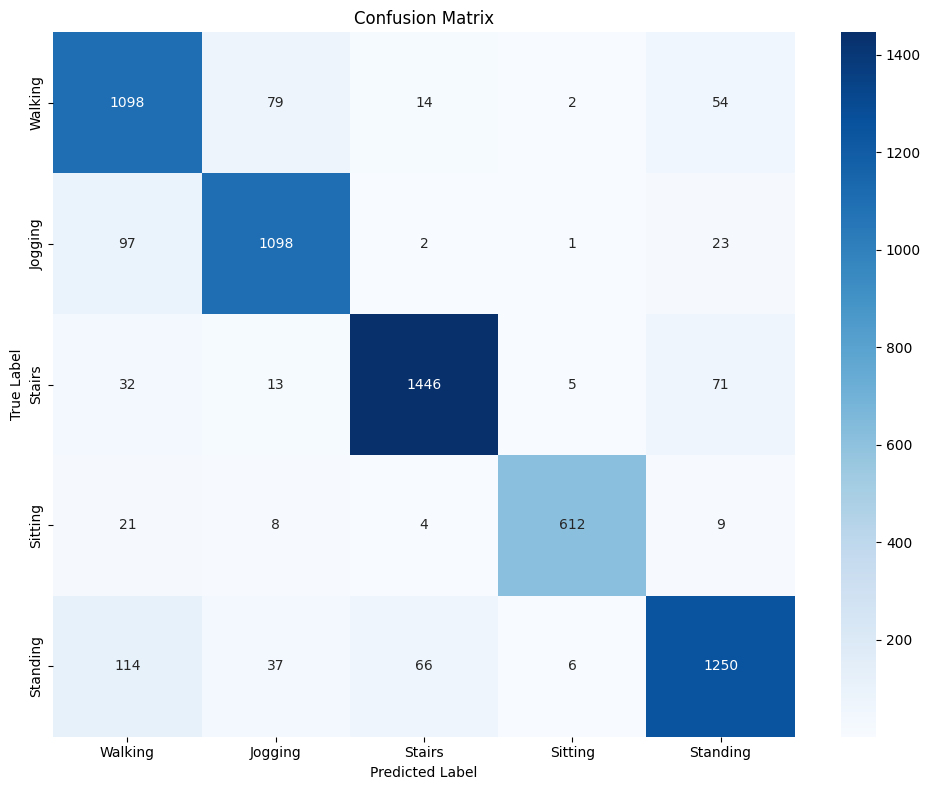

In [ ]:
classNames=['Walking','Jogging','Stairs','Sitting',
    'Standing',
    # 'Writing',
    # 'Eating',
    # 'Playing sports'
]
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions from probabilities to class labels (integer class labels)
predictions_labels = np.argmax(predictions, axis=1)
display_results(y_test_labels, predictions_labels, classNames)

#LSTM + 1D CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Reshape input data if not already done
X_train_cnn_lstm = X_train.reshape((X_train.shape[0], 60, 6))
X_test_cnn_lstm = X_test.reshape((X_test.shape[0], 60, 6))

# Number of classes (one-hot encoded y_train)
num_classes = y_train.shape[1]

# Final model with best hyperparameters
model_1d_cnn_lstm = Sequential([
    # Conv1D Block
    Conv1D(
        filters=128,          # best param
        kernel_size=5,        # best param
        activation='relu',
        padding='same',
        input_shape=(60, 6)
    ),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),            # best param

    # LSTM Block
    LSTM(32, return_sequences=False),  # best param
    Dropout(0.3),                      # best param

    # Fully Connected
    Dense(64, activation='relu'),      # best param
    Dropout(0.5),                      # best param

    # Output Layer
    Dense(num_classes, activation='softmax')
])

# Compile with best learning rate
model_1d_cnn_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # best param
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model_1d_cnn_lstm.fit(
    X_train_cnn_lstm, y_train,
    validation_data=(X_test_cnn_lstm, y_test),
    epochs=20,
    batch_size=64
)

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.6111 - loss: 1.0327 - val_accuracy: 0.8176 - val_loss: 0.5434
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8261 - loss: 0.5812 - val_accuracy: 0.8599 - val_loss: 0.4470
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8441 - loss: 0.5117 - val_accuracy: 0.8734 - val_loss: 0.3999
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8572 - loss: 0.4666 - val_accuracy: 0.8793 - val_loss: 0.3800
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8679 - loss: 0.4332 - val_accuracy: 0.8804 - val_loss: 0.3719
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8663 - loss: 0.4397 - val_accuracy: 0.8711 - val_loss: 0.3892
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8721 - loss: 0.4144 - val_accuracy: 0.8913 - val_loss: 0.3407
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8664 - loss: 0.4112 - 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict class probabilities
y_pred_probs = model_1d_cnn_lstm.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, F1 (macro for multi-class)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy : 0.9043
Precision: 0.9145
Recall   : 0.9077
F1 Score : 0.9098


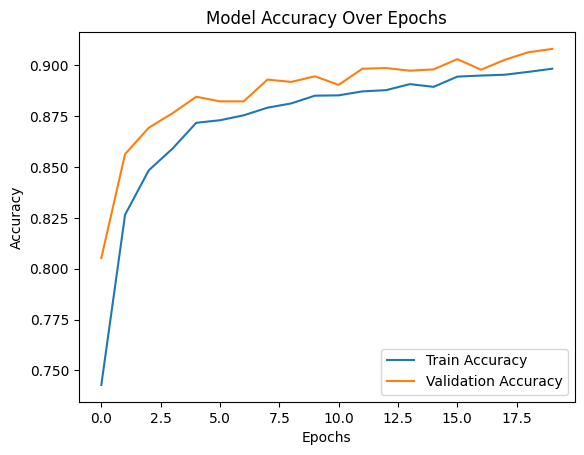

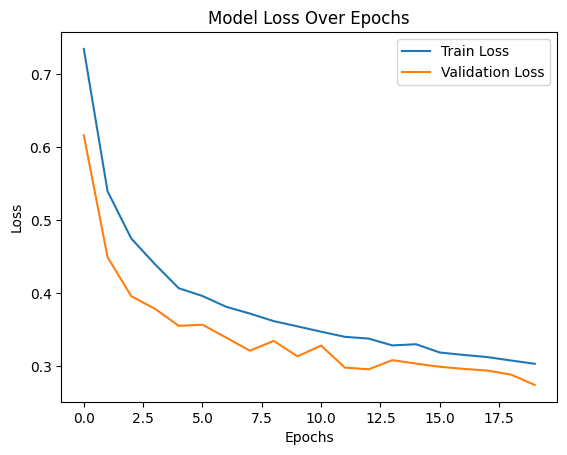

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

In [ ]:
batch_size = 64
# evaluate model
test_loss, test_accuracy = model_1d_cnn_lstm.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model_1d_cnn_lstm.predict(X_test)

Accuracy of the CNN model 0.9042518734931946
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step



**** Classification Report ****
              precision    recall  f1-score   support

     Walking       0.79      0.91      0.85      1247
     Jogging       0.93      0.91      0.92      1221
      Stairs       0.97      0.92      0.94      1567
     Sitting       0.99      0.93      0.96       654
    Standing       0.89      0.87      0.88      1473

    accuracy                           0.90      6162
   macro avg       0.91      0.91      0.91      6162
weighted avg       0.91      0.90      0.91      6162



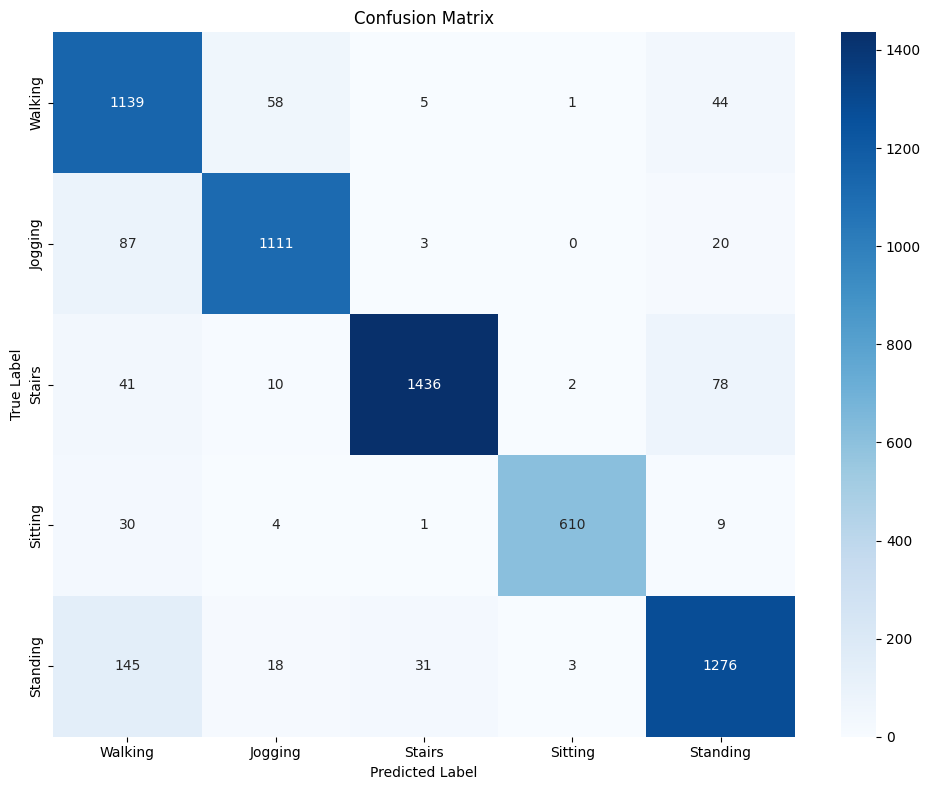

In [ ]:
classNames=['Walking','Jogging','Stairs','Sitting',
    'Standing',
    # 'Writing',
    # 'Eating',
    # 'Playing sports'
]
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions from probabilities to class labels (integer class labels)
predictions_labels = np.argmax(predictions, axis=1)
display_results(y_test_labels, predictions_labels, classNames)

#LSTM + 2D CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, LSTM, Dense, Dropout, Flatten

# Dataset info
input_shape = (6, 60, 1)   # channels last
num_classes = y_train.shape[1]

# Build CNN + LSTM hybrid model
model_2d_cnn_lstm = Sequential([
    # 1st Conv2D block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # 2nd Conv2D block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten + reshape for LSTM
    Flatten(),

    # Dynamically reshape for LSTM
    Reshape((15, -1)),   # e.g., 15 timesteps (adjust if needed)

    # LSTM block
    LSTM(32, return_sequences=False),
    Dropout(0.3),

    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# Compile
model_2d_cnn_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     tf.keras.callbacks.ModelCheckpoint(
#         '/content/drive/MyDrive/HAR Data & Models/final_best_cnn2d_lstm_model.h5',
#         save_best_only=True,
#         monitor='val_loss'
#     )
# ]

# Train
history = model_2d_cnn_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    #callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc = model_2d_cnn_lstm.evaluate(X_test, y_test, verbose=0)
print(f"✅ CNN+LSTM Test Accuracy: {test_acc:.4f}")

# Save final trained model
model_2d_cnn_lstm.save("final_cnn2d_lstm_model.h5")
print("Final CNN2D+LSTM model saved as final_cnn2d_lstm_model.h5")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 34s 79ms/step - accuracy: 0.6400 - loss: 0.9324 - val_accuracy: 0.8053 - val_loss: 0.6164
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8167 - loss: 0.5649 - val_accuracy: 0.8564 - val_loss: 0.4496
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.8368 - loss: 0.5069 - val_accuracy: 0.8694 - val_loss: 0.3961
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8514 - loss: 0.4619 - val_accuracy: 0.8765 - val_loss: 0.3789
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.8716 - loss: 0.4084 - val_accuracy: 0.8846 - val_loss: 0.3556
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.8732 - loss: 0.3954 - val_accuracy: 0.8823 - val_loss: 0.3572
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.8705 - loss: 0.3934 - val_accuracy: 0.8823 - val_loss: 0.3395
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8822 - loss: 0.3678 - val_accurac

✅ CNN+LSTM Test Accuracy: 0.9081
Final CNN2D+LSTM model saved as final_cnn2d_lstm_model.h5


In [ ]:
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=25,
#     batch_size=64,
#     verbose=1,
#     #callbacks=callbacks
# )

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict class probabilities
y_pred_probs = model_2d_cnn_lstm.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, F1 (macro for multi-class)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Accuracy : 0.9081
Precision: 0.9169
Recall   : 0.9106
F1 Score : 0.9132


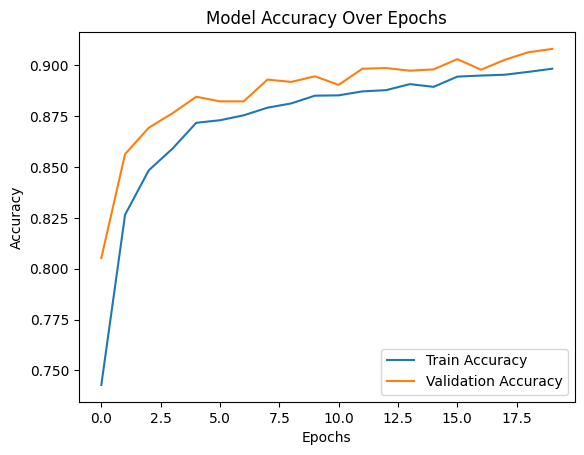

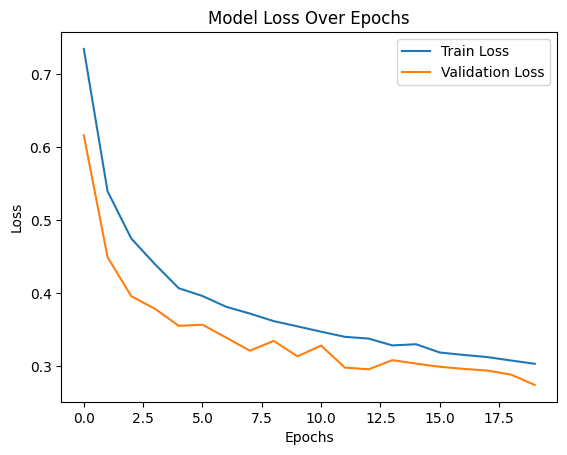

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

In [ ]:
batch_size = 64
# evaluate model
test_loss, test_accuracy = model_2d_cnn_lstm.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy of the CNN model", test_accuracy)
predictions=model_2d_cnn_lstm.predict(X_test)

Accuracy of the CNN model 0.9081466794013977
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step



**** Classification Report ****
              precision    recall  f1-score   support

     Walking       0.83      0.91      0.87      1247
     Jogging       0.93      0.91      0.92      1221
      Stairs       0.95      0.93      0.94      1567
     Sitting       0.99      0.93      0.96       654
    Standing       0.88      0.88      0.88      1473

    accuracy                           0.91      6162
   macro avg       0.92      0.91      0.91      6162
weighted avg       0.91      0.91      0.91      6162



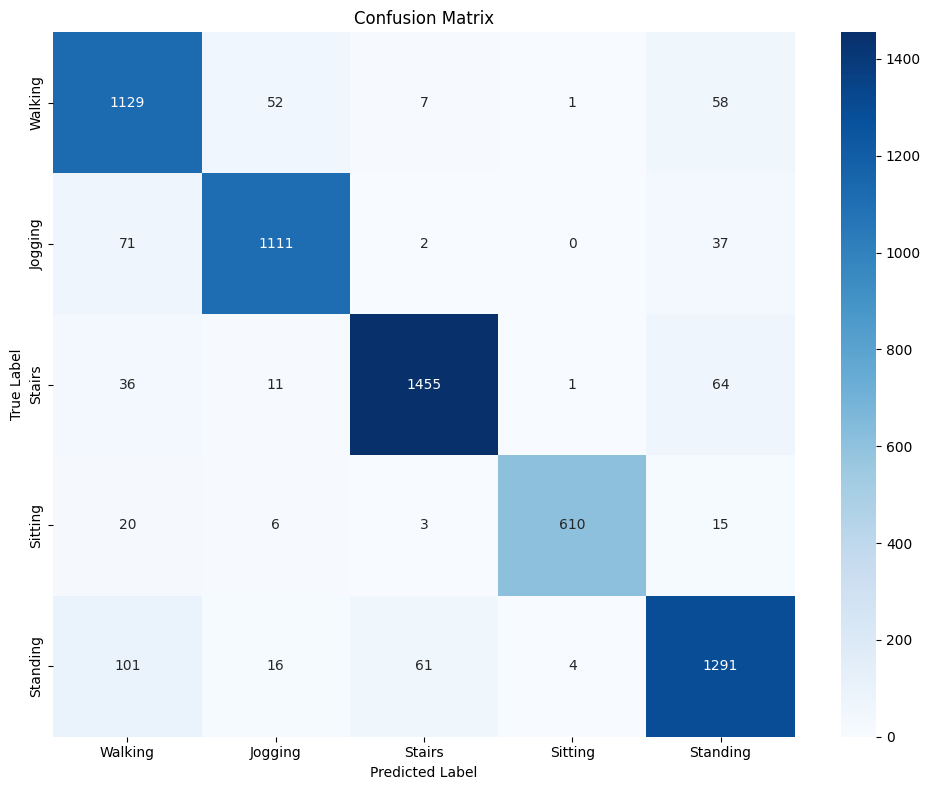

In [ ]:
classNames=['Walking','Jogging','Stairs','Sitting',
    'Standing',
    # 'Writing',
    # 'Eating',
    # 'Playing sports'
]
y_test_labels = np.argmax(y_test, axis=1)

# Convert predictions from probabilities to class labels (integer class labels)
predictions_labels = np.argmax(predictions, axis=1)
display_results(y_test_labels, predictions_labels, classNames)